      hostname       os  environment  country  node
0     LIITA001    Linux  Integration    Italy     1
1     LSESP001    Linux      Staging    Spain     1
2     APIRL001      AIX   Production  Ireland     1
3     LPITA001    Linux   Production    Italy     1
4     SSFRA001  Solaris      Staging   France     1
...        ...      ...          ...      ...   ...
1495  LTFRA012    Linux      Testing   France    12
1496  LPNOR011    Linux   Production   Norway    11
1497  APESP011      AIX   Production    Spain    11
1498  LPDEU052    Linux   Production  Germany    52
1499  HTESP006    HP-UX      Testing    Spain     6

[1500 rows x 5 columns]
      hostname       os  environment  country  node
0     LIITA001    Linux  Integration    Italy     1
1     LSESP001    Linux      Staging    Spain     1
2     APIRL001      AIX   Production  Ireland     1
3     LPITA001    Linux   Production    Italy     1
4     SSFRA001  Solaris      Staging   France     1
...        ...      ...          ...   

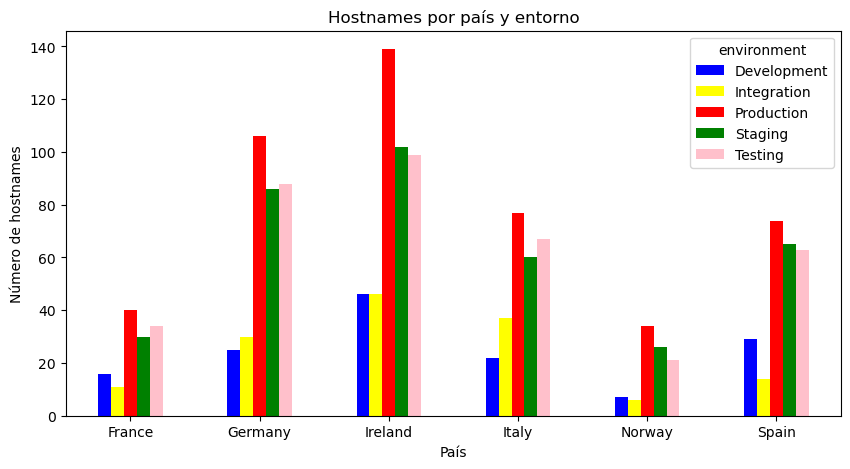

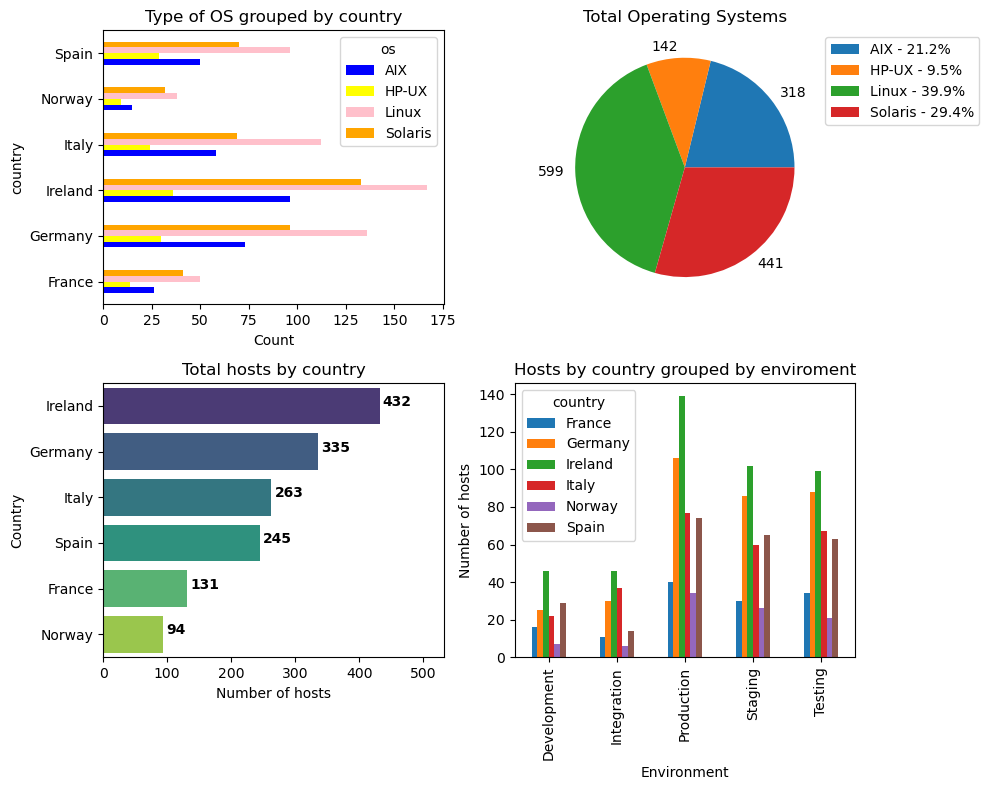

In [2]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

hostnames=[]
dataset=[]
df=pd.DataFrame(None)


def set_hostnames(number_of_hosts: int) -> None:
    os_prefix = ['L']*4 + ['S']*3 + ['A']*2 + ['H']*1  # 40% Linux | 30% Solaris | 20% AIX | 10% HP-UX
    enviroments = ['D']*10 + ['I']*10 + ['T']*25 + ['S']*25 + ['P']*30
    alpha_3_country_codes = ['NOR']*6 + ['FRA']*9 + ['ITA']*16 + ['ESP']*16 + ['DEU']*23 + ['IRL']*30
    grupo_alpha = []
    
    for i in range(number_of_hosts):
        country = random.choice(alpha_3_country_codes)
        hostname = random.choice(os_prefix) + random.choice(enviroments)
        hostname += country
        grupo_alpha.append(hostname)
        hostname += str(grupo_alpha.count(hostname)).zfill(3)
        hostnames.append(hostname)
        

def get_os(hostname: str) -> str:
    if hostname.startswith('L'):
        return 'Linux'
    elif hostname.startswith('S'):
        return 'Solaris'
    elif hostname.startswith('A'):
        return 'AIX'
    elif hostname.startswith('H'):
        return 'HP-UX'
    else:
        return 'Unknow'


def get_environment(hostname: str) -> str:
    if hostname[1] == ('D'):
        return 'Development'
    elif hostname[1] == ('I'):
        return 'Integration'
    elif hostname[1] == ('T'):
        return 'Testing'
    elif hostname[1] == ('S'):
        return 'Staging'
    elif hostname[1] == ('P'):
        return 'Production'
    else:
        return 'Unknow'
    
def get_country(hostname: str) -> str:
    if hostname[2:5] == ('NOR'):
        return 'Norway'
    elif hostname[2:5] == ('FRA'):
        return 'France'
    elif hostname[2:5] == ('ITA'):
        return 'Italy'
    elif hostname[2:5]== ('ESP'):
        return 'Spain'
    elif hostname[2:5] == ('DEU'):
        return 'Germany'
    elif hostname[2:5] == ('IRL'):
        return 'Ireland'
    else:
        return 'Unknow'
    

def set_dataframe(count:int):
    global df
    set_hostnames(count)

    for hostname in hostnames:        
        hostnames_dict = {
        'hostname': hostname,
        'os': get_os(hostname),
        'environment': get_environment(hostname),
        'country': get_country(hostname),
        'node': int(hostname[5:8])
        }
        dataset.append(hostnames_dict)

    df = pd.DataFrame(dataset)

set_dataframe(1500)
print(df)

df.to_csv('hosts.csv', header=True, index=False)
hosts_df = pd.read_csv('hosts.csv')
print(hosts_df) 



# Apartado 10 de la práctica:
# Agrupo y cuento hostnames por país y entorno
grouped = df.groupby(['country', 'environment']).size()

# Desdoblo el dataframe
unstacked = grouped.unstack()

# Gráfico de barras del dataframe desdoblado
# Muestro cada país en una columna partimentalizada diferente donde cada environment muestra en un color diferente.
unstacked.plot(kind='bar', figsize=(10,5), rot=0, color=['blue', 'yellow', 'red', 'green', 'pink', 'orange'])

# Doy un título al gráfico y a los ejes X e Y
plt.title('Hostnames por país y entorno')
plt.xlabel('País')
plt.ylabel('Número de hostnames')

plt.show()



# Apartado 11 de la práctica:

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Gráfico 1: Type of OS grouped by country
# Agrupo sistemas operativos por país y cuento cuántos de ellos hay en cada país.

grouped = df.groupby(['country', 'os']).size()
unstacked = grouped.unstack()
unstacked.plot(kind='barh', ax=axs[0, 0], color=['blue', 'yellow', 'pink', 'orange'])
axs[0, 0].barh(grouped, width=0.8)
axs[0, 0].set_title('Type of OS grouped by country')
axs[0, 0].set_xlabel('Count')
axs[0, 0].set_ylabel('country')


# Gráfico 2: Total Operating Systems
# Agrupo por sistema operativo y cuento cuántos de cada uno de ellos hay.
# Creo el gráfico de tarta (pie) con la función plot añadiendo un segundo gráfico a la figura.
grouped_os = df.groupby('os').size()
pie = grouped_os.plot(kind='pie', ax=axs[0, 1], labels=grouped_os.values)
pie.legend(labels=['{0} - {1:1.1f}%'.format(os, (count/sum(grouped_os))*100) for os, count in zip(grouped_os.index, grouped_os.values)], loc='upper right', bbox_to_anchor=(1.6, 1))
axs[0, 1].set_title('Total Operating Systems')
axs[0, 1].set_ylabel('')

# Gráfico 3: Total hosts by country
country_counts = df['country'].value_counts()
sns.barplot(x=country_counts, y=country_counts.index, ax=axs[1, 0], palette='viridis')
axs[1, 0].set_title('Total hosts by country')
axs[1, 0].set_xlabel('Number of hosts')
axs[1, 0].set_ylabel('Country')
axs[1, 0].set_xlim([0, country_counts.max() + 100])
for i, Totalhosts in enumerate(country_counts):
    axs[1, 0].text(Totalhosts + 5, i, str(Totalhosts), color='black', fontweight='bold')
    
# Gráfico 4: Hosts by country grouped by environment
df.groupby(['country', 'environment']).size().unstack(0).plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Hosts by country grouped by enviroment')
axs[1, 1].set_xlabel('Environment')
axs[1, 1].set_ylabel('Number of hosts')

# Ajusto los márgenes y espacios entre los gráficos
fig.tight_layout()

# Muestro el gráfico
plt.show()
